<a href="https://colab.research.google.com/github/Vashistsanskar/analysis_on_breast_cancer_data/blob/main/Analysis_on_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [48]:
df = pd.read_csv('/content/breast-cancer.csv')

### 1.) First we remove the extra id column
###2.) Then we check if types of data in each column and what about missing values by using df.info()

In [5]:
df.drop(columns='id',inplace=True)

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

###3.) Only target columns is categorical and others are numerical--> We encode them {M = malignant, B = benign} Therefore , M--> 1(Yes) and B--> 0(NO)

In [8]:
df['diagnosis'].replace({
    'M':1,
    'B':0
},inplace=True)

/tmp/ipython-input-8-680110013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({
/tmp/ipython-input-8-680110013.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({


fractal_dimension_worst,symmetry_mean,smoothness_mean

###4.) Now we check how much each column corelated with target column by df.corr()

In [9]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
df.iloc[:,0:19].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298


In [11]:
df1 = df.iloc[:,18:]

In [12]:
df1['diagnosis'] = df['diagnosis']

In [13]:
df1.corr()

,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
concave points_se,1.000000,0.312780,0.611044,0.358127,0.086741,0.394999,0.342271,0.215351,0.452888,0.549592,0.602450,0.143116,0.310655,0.408042
symmetry_se,0.312780,1.000000,0.369078,-0.128121,-0.077473,-0.103753,-0.110343,-0.012662,0.060255,0.037119,-0.030413,0.389402,0.078079,-0.006522
fractal_dimension_se,0.611044,0.369078,1.000000,-0.037488,-0.003195,-0.001000,-0.022736,0.170568,0.390159,0.379975,0.215204,0.111094,0.591328,0.077972
radius_worst,0.358127,-0.128121,-0.037488,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.086741,-0.077473,-0.003195,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.394999,-0.103753,-0.001000,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.342271,-0.110343,-0.022736,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.215351,-0.012662,0.170568,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.452888,0.060255,0.390159,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.549592,0.037119,0.379975,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610


# **Observations**
##*--> Corelation b/w traget feature and input features <--*
###Highly corelated columns:-
### --> concavepoints_worst>perimeter_worst>fractal_dimension_se>concave points_mean>radius_worst

###Negatively corelated columns:-
### --> smoothness_se>fractal_dimension_mean>texture_se

##Now, Let's train our first model and check it's accuracy
##SVC-->Support vector classifier

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='diagnosis'),df['diagnosis'],test_size=0.2,random_state=42)

In [15]:
from sklearn.svm import SVC
svc = SVC(C=10,tol=0.01,kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=10, tol=0.01)

In [16]:
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9473684210526315

In [17]:
param_grid = [
    {
        'kernel':['rbf'],
        'C':[0.001,0.01,0.1,1,10],
        'tol':[0.001,0.01,0.1,1]
    },
    {
        'kernel':['poly'],
        'C':[0.001,0.01,0.1,1,10],
        'tol':[0.001,0.01,0.1,1],
        'degree':[2,3,4]
    }
]

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, tol=0.01),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf'],
                          'tol': [0.001, 0.01, 0.1, 1]},
                         {'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                          'kernel': ['poly'], 'tol': [0.001, 0.01, 0.1, 1]}],
             scoring='accuracy')

In [19]:
y_pred = grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [20]:
grid.best_params_

{'C': 10, 'degree': 2, 'kernel': 'poly', 'tol': 1}

###So, after using GridSearchcv{Hyperpameter tuning} we touch accuracy of 97 .

###Let's try to improve this
##Step-1: First we check does multicolinearity exists.
###Multicolinearity-> Corelation b/w input features

##To check This we calcuate ***variance_inflation_factor***

####- if < 5 no multicolinearity
####- if > 5 less
####- if >20 Mediate
####- if > 100 high



In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#DataFrame has only NUMERICAL (or ENCODED) features
X = df.copy()

# Add constant (intercept) for VIF computation
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                    Feature          VIF
0                     const  1945.673866
1                 diagnosis     4.431144
2               radius_mean  3817.259795
3              texture_mean    11.891280
4            perimeter_mean  3792.697001
5                 area_mean   348.115385
6           smoothness_mean     8.194309
7          compactness_mean    51.445960
8            concavity_mean    71.002747
9       concave points_mean    60.172431
10            symmetry_mean     4.220806
11   fractal_dimension_mean    15.756978
12                radius_se    75.737325
13               texture_se     4.205686
14             perimeter_se    70.398925
15                  area_se    41.196467
16            smoothness_se     4.070801
17           compactness_se    15.366350
18             concavity_se    15.914022
19        concave points_se    11.601253
20              symmetry_se     5.179151
21     fractal_dimension_se     9.724753
22             radius_worst   815.945630
23            te

### we Have very High MultiColinearity
### Highest --> radius_mean-3817 > perimeter_mean-3792

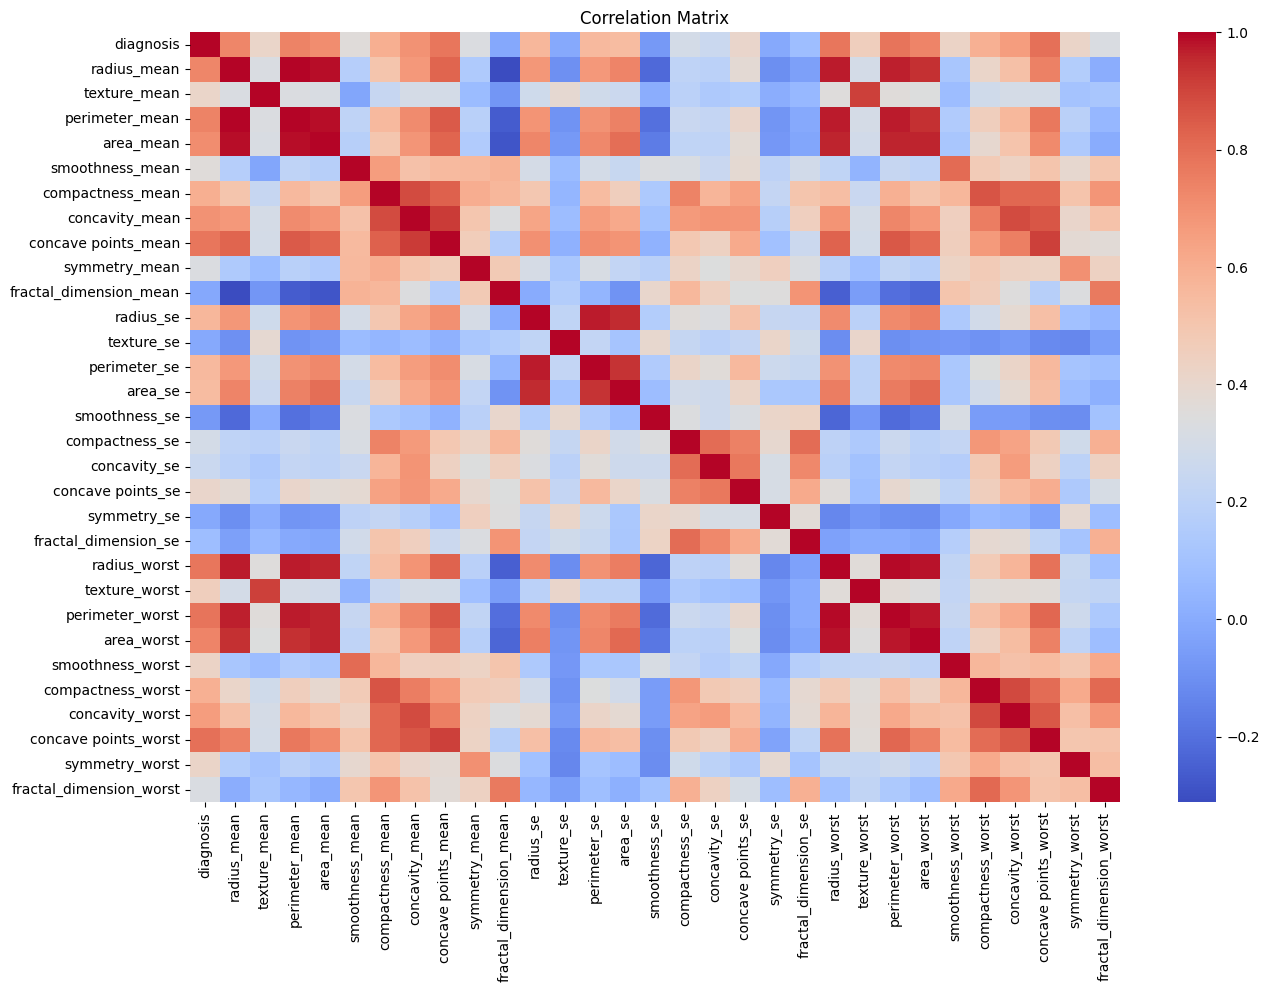

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


#You can also see dark brown portion in this heatmap which are not at diagonal position

##First we apply StandardScaler
##-->Now, we first drop perimeter_mean column and check accuracy_score
##--> Similarly we calculate scores by dropping perimeter_mean col & finally we select the best option




In [66]:
df.drop(columns='perimeter_mean',inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='diagnosis'),df['diagnosis'],test_size=0.2,random_state=42)

In [36]:
scaler = StandardScaler()

In [37]:
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

In [38]:
from sklearn.svm import SVC
svc1 = SVC()
svc1.fit(X_train_trans,y_train)

SVC()

In [40]:
y_pred = svc1.predict(X_test_trans)

In [41]:
Pacc= accuracy_score(y_test,y_pred)

In [42]:
Pacc

0.9824561403508771

In [46]:
#cross_val_score
Pcross_score=cross_val_score(estimator=svc1,X=X_train_trans,y=y_train,cv=5,scoring='accuracy')

In [47]:
Pcross_score

array([0.97802198, 0.96703297, 0.98901099, 0.98901099, 0.93406593])

In [62]:
#Classification_Report
Pclassification = classification_report(y_test,y_pred)

In [64]:
print(Pclassification)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##Now we remove radius_mean columns
##Let me refresh my read_csv cell{so perimeter_mean col will add again to dataset}

In [49]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
df.drop(columns='radius_mean',inplace=True)

In [51]:
X1_train,X1_test,y1_train,y1_test = train_test_split(df.drop(columns='diagnosis'),df['diagnosis'],test_size=0.2,random_state=42)

In [52]:
svc2 = SVC()

In [54]:
X1_train_trans=scaler.fit_transform(X1_train)
X1_test_trans=scaler.transform(X1_test)

In [55]:
svc2.fit(X1_train_trans,y1_train)

SVC()

In [57]:
y1_pred = svc2.predict(X1_test_trans)

In [58]:
Racc = accuracy_score(y1_test,y1_pred)

In [59]:
Racc

0.9824561403508771

In [60]:
#cross_val_score
Rcross_score=cross_val_score(estimator=svc2,X=X1_train_trans,y=y1_train,cv=5,scoring='accuracy')

In [61]:
Rcross_score

array([0.97802198, 0.96703297, 0.98901099, 0.98901099, 0.94505495])

In [65]:
#Classification_Report
Rclassification = classification_report(y1_test,y1_pred)
print(Rclassification)

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##As you see results are almost same for both

##Now, it's your choice what you want to drop either *perimeter_mean* or *radius_mean*